<a href="https://colab.research.google.com/github/MoseAIML/Moses-/blob/main/Data_Visualization_with_Seaborn_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AfterWork Data Science: Data Visualisation with Seaborn


## 1. Business Understanding




As a data analyst working with Quick Mart chain of supermarkets, the task is to create an analysis report, complete with recommendations to guide the management team on a marketing strategy decision.

The report should include:
- Which product categories performed best.
- Which branches had the highest sales and profits
- What key trends in sales in each branch are noticeable over the time.
- The average amount spent by customers for each branch.
The average rating for each branch.

## 2. Data Exploration

In [1]:
# Loading libraries
# ---
# 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
 

In [2]:
# Loading the dataset
# --- 
# Dataset url = https://bit.ly/SupermarketsDS
# --- 
# YOUR CODE GOES HERE
df = pd.read_csv("https://bit.ly/SupermarketsDS")

In [3]:
# Determining the size 
# ---
# YOUR CODE GOES HERE

df.shape

(1000, 17)

In [4]:
# Checking the datatypes
# ---
# YOUR CODE GOES HERE
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [5]:
# Statistical summary
# ---
# YOUR CODE GOES HERE

df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


## 3. Data Cleaning

In [6]:
# Checking for duplicates 
# ---
# YOUR CODE GOES HERE

df.duplicated().sum()

0

In [7]:
# Checking for missing values 
# ---
# YOUR CODE GOES HERE

df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [8]:
# Dropping irrelevant columns
# ---
# YOUR CODE GOES HERE

df.drop(labels='gross margin percentage', axis=1, inplace=True)
df.drop(labels='cogs', axis=1, inplace=True)

df.dtypes

Invoice ID        object
Branch            object
City              object
Customer type     object
Gender            object
Product line      object
Unit price       float64
Quantity           int64
Tax 5%           float64
Total            float64
Date              object
Time              object
Payment           object
gross income     float64
Rating           float64
dtype: object

## 4. Data analysis and visualisation (Using Seaborn for visualisation)

We investigate the questions listed above in order to craft a fact-driven recommendation.

### 4.a) Questions

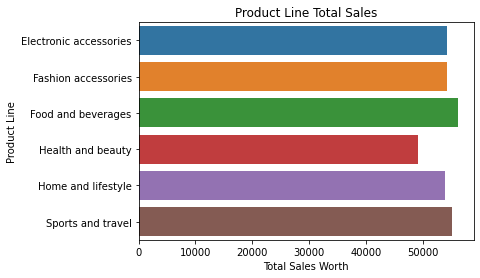

In [9]:
# Question 1 - Which product categories(Product_line) performed best.
# YOUR CODE GOES HERE

#statistics on how each product did
df.groupby('Product line').sum()

#bar chart based on product line and total
total_per_product = df.groupby(['Product line'], as_index=False).agg({'Total': np.sum})
total_per_product

sns.barplot(data = total_per_product, x = "Total", y = "Product line")

# Tweak and Label
plt.xlabel('Total Sales Worth')
plt.ylabel('Product Line')
plt.title('Product Line Total Sales')

# Display
plt.show()

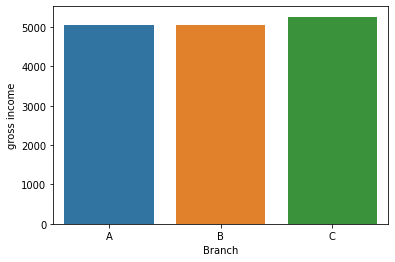

In [10]:
# Question 2: Which branches had the highest sales(quantity) and profits(tax 5%, gross income) ?
# YOUR CODE GOES HERE

#find 
not_matching = df['Tax 5%'] != df['gross income']
not_matching.unique()


#find branch with highest sales
quantities_sold = df.groupby(['Branch'], as_index=False).agg({'Quantity': np.sum})
quantities_sold.head()

#find branch with highest profits
gross_per_branch = df.groupby(['Branch'], as_index=False).agg({'gross income': np.sum})
gross_per_branch
 
# Render the plots
sns.barplot(data = gross_per_branch, x = "Branch", y = "gross income")


# Display the plot
plt.show()


In [ ]:
# Question 3: What key trends in sales in each branch are noticeable over the time.
# YOUR CODE GOES HERE
df.head()

branch_A =df[df.Branch.isin(['A'])]
branch_B =df[df.Branch.isin(['B'])]
branch_C =df[df.Branch.isin(['C'])]

plt.figure(figsize = (20,5))

# Render the plots 
ax1 = sns.lineplot(data = branch_A, x="Date" ,y="Total",color="blue", label="A")
ax2 = sns.lineplot(data = branch_B, x="Date", y="Total", color="red", label="B")
ax3 = sns.lineplot(data = branch_C, x="Date", y="Total", color="green", label="C")

# Add a title
plt.title('Sales over Time')

# Add an x-axis label
plt.xticks(rotation = 90)
plt.xlabel('Dates')

# Add a y-axis label 
plt.ylabel('Totals')

# Add a legend
plt.legend()

# Add a grid
ax1.grid()

# Display the plot
fig.show()


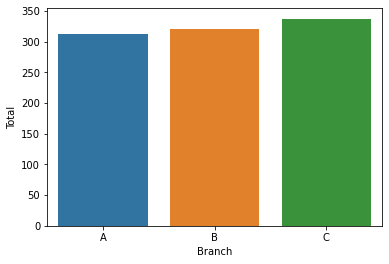

In [ ]:
# Question 4(a): The average amount spent by customers for each branch.
# YOUR CODE GOES HERE

data = df.groupby(['Branch'], as_index=False).agg({'Total': np.mean})
data.head()

sns.barplot(data = data, x = "Branch", y = "Total")

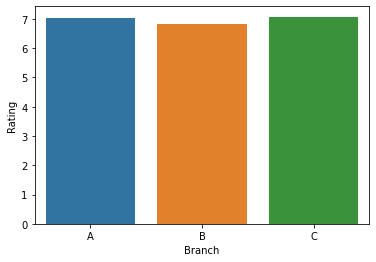

In [ ]:
# Question 4(b):The average rating for each branch.
# YOUR CODE GOES HERE

data = df.groupby(['Branch'], as_index=False).agg({'Rating': np.mean})
data

sns.barplot(data = data, x = "Branch", y = "Rating")

## 5. Summary of findings

What observations did you make from your analysis?

Food and beverages do not have the highest unit price but they make the most profit for the supermarkets

Branch C has the best ratings and customers spend the most in the branch as compared to the others

## 6. Recommendations

What recommendations can you make from your analysis/observations?

1. Add more food and beverage items across the branches as this is the item most customers buy
2. Run a sale around health and beauty products to improve sales/product awareness
